In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 156MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


In [14]:
import zipfile
zip=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip.extractall('/content')
zip.close()

In [15]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
def process(image,lable):
  image=tf.cast(image/255.,tf.float32)
  return image,lable

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [27]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [30]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 68s 102ms/step - loss: 1.2592 - accuracy: 0.5723 - val_loss: 0.9677 - val_accuracy: 0.5574
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6379 - accuracy: 0.6392 - val_loss: 0.6265 - val_accuracy: 0.6268
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5776 - accuracy: 0.7039 - val_loss: 0.6220 - val_accuracy: 0.6450
Epoch 4/10
625/625 [==============================] - 65s 102ms/step - loss: 0.5341 - accuracy: 0.7358 - val_loss: 0.6187 - val_accuracy: 0.6552
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4832 - accuracy: 0.7708 - val_loss: 0.6343 - val_accuracy: 0.6450
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4398 - accuracy: 0.7954 - val_loss: 0.4928 - val_accuracy: 0.7658
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3912 - accuracy: 0.8219 - val_loss: 0.4657 - val_ac

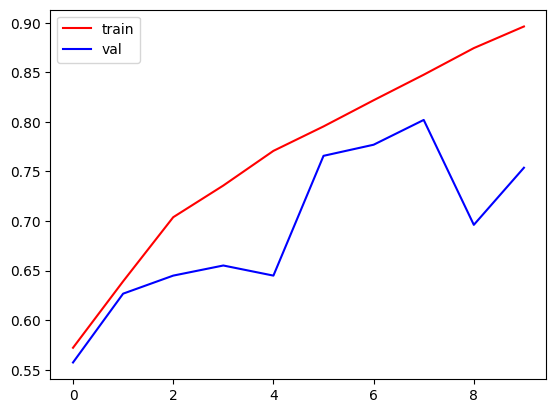

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color ='r',label='train')
plt.plot(history.history['val_accuracy'],color ='b',label='val')
plt.legend()
plt.show()

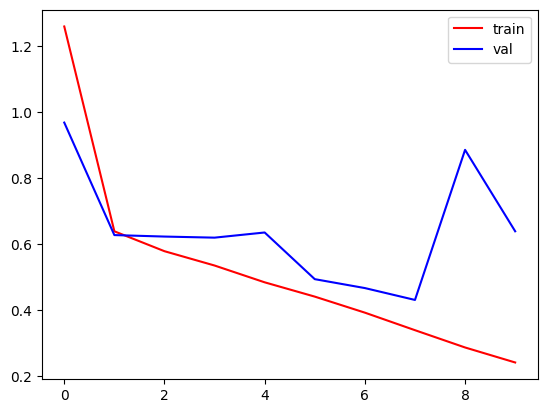

In [33]:
plt.plot(history.history['loss'],color ='r',label='train')
plt.plot(history.history['val_loss'],color ='b',label='val')
plt.legend()
plt.show()

In [34]:
import cv2

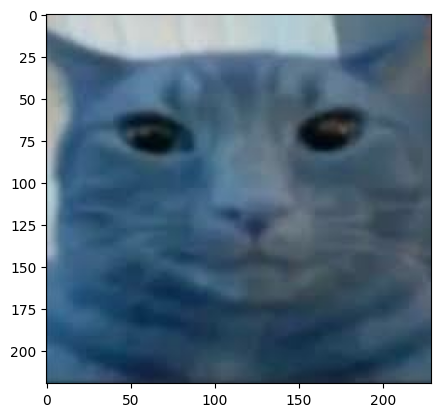

In [41]:
img= cv2.imread('/content/car.jpg')
plt.imshow(img)

In [42]:
img=cv2.resize(img,(256,256))
input=img.reshape((1,256,256,3))
model.predict(input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)